### Mission #1: 
Download the following five stock index
information from Yahoo Finance and compare the changes.

In [24]:
import yfinance as yf
import pandas as pd
import sqlite3

ticker = ['^IXIC','^SPX', '^DJI', '000001.SS', '^KS11']
name  = ['Nasdaq_Composite_index_data', 'SnP_500_index_data', 'Dow_Jones_Industrial_Average_data', 'Shanghai_Composite_index_data', 'KOSPI_index_data']
conn = sqlite3.connect('Nasdaq_Composite_index_data.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS Nasdaq_Composite_index_data')
cursor.execute('''
CREATE TABLE IF NOT EXISTS Nasdaq_Composite_index_data (
    Date TEXT PRIMARY KEY,
    Open REAL,
    High REAL,
    Low REAL,
    Close REAL,
    Volume INTEGER
)
''')

conn.commit()
for i, ticks in enumerate(ticker):
    data = yf.download(ticks, start='2019-01-01', end='2022-12-31')
    conn = sqlite3.connect(f'{name[i]}.db')
    cursor = conn.cursor()
    cursor.execute(f'DROP TABLE IF EXISTS {name[i]}')
    cursor.execute(f'''
    CREATE TABLE IF NOT EXISTS {name[i]} (
        Date TEXT PRIMARY KEY,
        Open REAL,
        High REAL,
        Low REAL,
        Close REAL,
        Volume INTEGER
    )
    ''')
    conn.commit()
    print(data.head())
    for index, row in data.iterrows():
        cursor.execute(f'''
                INSERT OR REPLACE INTO {name[i]} (Date, Open, High, Low, Close, Volume)
            VALUES (?, ?, ?, ?, ?, ?)
        ''', (index.strftime('%Y-%m-%d'),
            float(row['Open']),
            float(row['High']),
            float(row['Low']), 
            float(row['Close']),
            int(row['Volume'])))
    print(f"Data for {name[i]} has been inserted into the database.")
    conn.commit()
    conn.close()



[*********************100%***********************]  1 of 1 completed
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:45: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futur

Price             Close         High          Low         Open      Volume
Ticker            ^IXIC        ^IXIC        ^IXIC        ^IXIC       ^IXIC
Date                                                                      
2019-01-02  6665.939941  6693.709961  6506.879883  6506.910156  2261800000
2019-01-03  6463.500000  6600.209961  6457.129883  6584.770020  2631550000
2019-01-04  6738.859863  6760.689941  6554.240234  6567.140137  2596150000
2019-01-07  6823.470215  6855.600098  6741.399902  6757.529785  2523450000
2019-01-08  6897.000000  6909.580078  6795.859863  6893.439941  2407340000


[*********************100%***********************]  1 of 1 completed

Data for Nasdaq_Composite_index_data has been inserted into the database.
Price             Close         High          Low         Open      Volume
Ticker             ^SPX         ^SPX         ^SPX         ^SPX        ^SPX
Date                                                                      
2019-01-02  2510.030029  2519.489990  2467.469971  2476.959961  3733160000
2019-01-03  2447.889893  2493.139893  2443.959961  2491.919922  3858830000
2019-01-04  2531.939941  2538.070068  2474.330078  2474.330078  4234140000
2019-01-07  2549.689941  2566.159912  2524.560059  2535.610107  4133120000
2019-01-08  2574.409912  2579.820068  2547.560059  2568.110107  4120060000



/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:45: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/var/folder

Data for SnP_500_index_data has been inserted into the database.
Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2019-01-02  23346.240234  23413.470703  22928.589844  23058.609375  321570000
2019-01-03  22686.220703  23176.390625  22638.410156  23176.390625  424240000
2019-01-04  23433.160156  23518.640625  22894.919922  22894.919922  396020000
2019-01-07  23531.349609  23687.740234  23301.589844  23474.259766  334200000
2019-01-08  23787.449219  23864.650391  23581.449219  23680.320312  317420000



/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:45: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/var/folder

Data for Dow_Jones_Industrial_Average_data has been inserted into the database.
Price             Close         High          Low         Open    Volume
Ticker        000001.SS    000001.SS    000001.SS    000001.SS 000001.SS
Date                                                                    
2019-01-02  2465.291016  2500.278076  2456.423096  2497.881104    109900
2019-01-03  2464.363037  2488.479004  2455.926025  2461.782959    124400
2019-01-04  2514.867920  2515.315918  2440.906982  2446.019043    168900
2019-01-07  2533.089111  2536.978027  2515.508057  2528.698975    177300
2019-01-08  2526.461914  2531.344971  2520.165039  2530.300049    158100



/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:45: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/var/folder

Data for Shanghai_Composite_index_data has been inserted into the database.
Price             Close         High          Low         Open  Volume
Ticker            ^KS11        ^KS11        ^KS11        ^KS11   ^KS11
Date                                                                  
2019-01-02  2010.000000  2053.449951  2004.270020  2050.550049  326400
2019-01-03  1993.699951  2014.719971  1991.650024  2011.810059  428000
2019-01-04  2010.250000  2011.560059  1984.530029  1992.400024  409000
2019-01-07  2037.099976  2048.060059  2030.900024  2034.239990  440200
2019-01-08  2025.270020  2042.699951  2023.589966  2038.680054  397800



/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:44: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:45: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/var/folders/h8/5hxv73fd07d033x49543ghl00000gn/T/ipykernel_5606/2773241042.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/var/folder

Data for KOSPI_index_data has been inserted into the database.


### Mission #2:
 After reading the
values of the Close column
from the DB Table, a CSV file
is created by index and date.

1. Read the Close values from each created
DB Table to create five different
dataframes.
2. Read the values of the Close column
from the data frames for each index and
create one csv file consisting of the Close
values by date and index.

In [25]:
conn = sqlite3.connect(f'{name[0]}.db')
query = f'''SELECT Date, Close FROM {name[0]}
'''
print(name[0])
Nasdaq_Composite_index_data = pd.read_sql_query(query, conn, index_col='Date', parse_dates=True)
conn.close()

conn = sqlite3.connect(f'{name[1]}.db')
query = f'''SELECT Date, Close FROM {name[1]}
'''
print(name[1])
SnP_500_index_data = pd.read_sql_query(query, conn, index_col='Date', parse_dates=True)
conn.close()

conn = sqlite3.connect(f'{name[2]}.db')
query = f'''SELECT Date, Close FROM {name[2]}
'''
print(name[2])
Dow_Jones_Industrial_Average_data = pd.read_sql_query(query, conn, index_col='Date', parse_dates=True)
conn.close()

conn = sqlite3.connect(f'{name[3]}.db')
query = f'''SELECT Date, Close FROM {name[3]}
'''
print(name[3])
Shanghai_Composite_index_data = pd.read_sql_query(query, conn, index_col='Date', parse_dates=True)
conn.close()

conn = sqlite3.connect(f'{name[4]}.db')
query = f'''SELECT Date, Close FROM {name[4]}
'''
print(name[4])
KOSPI_index_data = pd.read_sql_query(query, conn, index_col='Date', parse_dates=True)
conn.close()

Nasdaq_Composite_index_data
SnP_500_index_data
Dow_Jones_Industrial_Average_data
Shanghai_Composite_index_data
KOSPI_index_data


In [26]:
KOSPI_index_data.head()

,Close
Date,
2019-01-02,2010.000000
2019-01-03,1993.699951
2019-01-04,2010.250000
2019-01-07,2037.099976
2019-01-08,2025.270020


In [27]:
Datafile = pd.DataFrame({
    'Nasdaq_Composite': Nasdaq_Composite_index_data['Close'],
    'SnP_500': SnP_500_index_data['Close'],
    'Dow_Jones': Dow_Jones_Industrial_Average_data['Close'],
    'Shanghai_Composite': Shanghai_Composite_index_data['Close'],
    'KOSPI': KOSPI_index_data['Close']
})
Datafile.to_csv('02513039_Cho.csv', index=True)

### Mission #3:
 Read values from a csv file and plot them as a
line graph with the values for 5 indices.

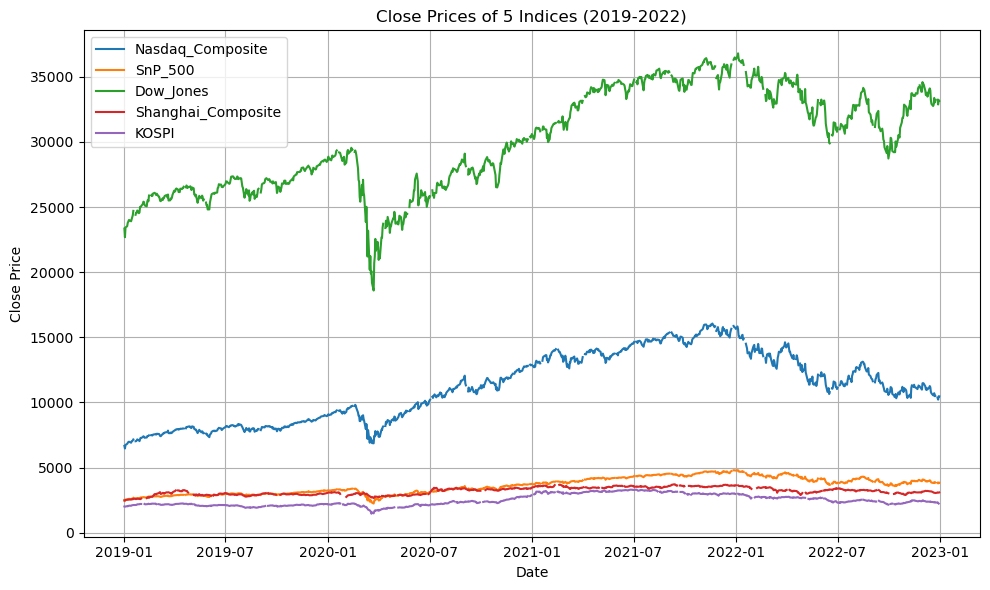

In [29]:
import matplotlib.pyplot as plt
df = pd.read_csv('Datafile.csv', index_col='Date', parse_dates=True)
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Close Prices of 5 Indices (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('02513039_Cho.png')
plt.show()


In [23]:
df

,Nasdaq_Composite,SnP_500,Dow_Jones,Shanghai_Composite,KOSPI
Date,,,,,
2019-01-02,6665.939941,2510.030029,23346.240234,2465.291016,2010.000000
2019-01-03,6463.500000,2447.889893,22686.220703,2464.363037,1993.699951
2019-01-04,6738.859863,2531.939941,23433.160156,2514.867920,2010.250000
2019-01-07,6823.470215,2549.689941,23531.349609,2533.089111,2037.099976
2019-01-08,6897.000000,2574.409912,23787.449219,2526.461914,2025.270020
...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,3065.562988,2317.139893
2022-12-27,10353.230469,3829.250000,33241.558594,3095.570068,2332.790039
2022-12-28,10213.290039,3783.219971,32875.710938,3087.399902,2280.449951
